Implement the following algorithms:

1. Topological sort
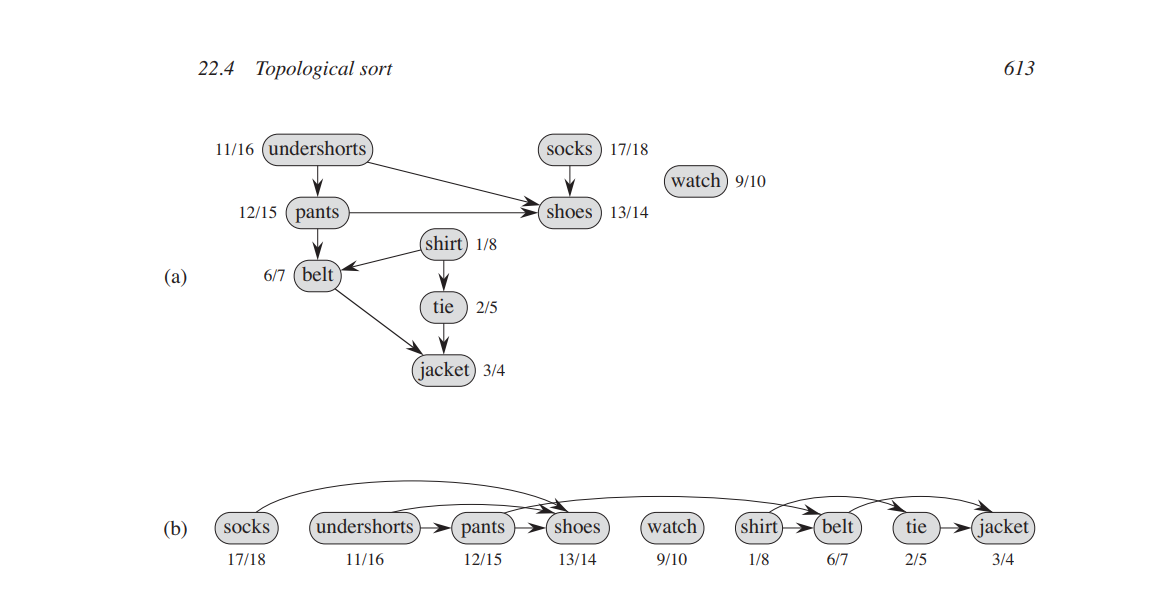

In [1]:
from collections import defaultdict

class TopologicalGraph:
    def __init__(self):
        self.graph = defaultdict(list)
        self.vertices = set()

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.vertices.add(u)
        self.vertices.add(v)

    def topological_sort(self):
        in_degree = {u: 0 for u in self.vertices}
        for u in self.graph:
            for v in self.graph[u]:
                in_degree[v] += 1

        queue = [u for u in self.vertices if in_degree[u] == 0]
        topological_order = []

        while queue:
            u = queue.pop(0)
            topological_order.append(u)
            for v in self.graph[u]:
                in_degree[v] -= 1
                if in_degree[v] == 0:
                    queue.append(v)

        if any(in_degree.values()):
            raise ValueError("Graph contains a cycle")

        return topological_order

# Testing the algorithm with the book example
g = TopologicalGraph()
g.add_edge('undershorts', 'socks')
g.add_edge('undershorts', 'pants')
g.add_edge('pants', 'belt')
g.add_edge('socks', 'belt')
g.add_edge('shirt', 'tie')
g.add_edge('tie', 'undershorts')
g.add_edge('belt', 'jacket')
g.add_edge('jacket', 'shoes')

print("Topological Ordering:")
print(g.topological_sort())

Topological Ordering:
['shirt', 'tie', 'undershorts', 'socks', 'pants', 'belt', 'jacket', 'shoes']


2. Depth-First Search

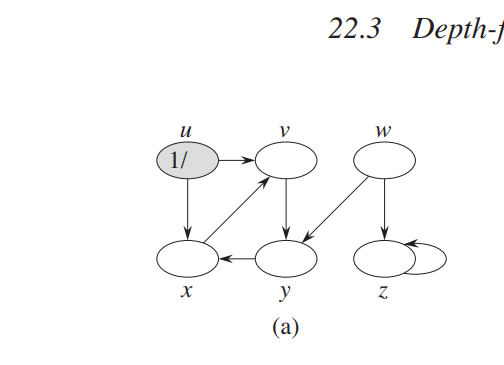

In [4]:
from collections import defaultdict

def depth_first_search(edges, start):
    graph = defaultdict(list)
    for u, v in edges:
        graph[u].append(v)

    visited = set()

    def dfs(v):
        if v not in visited:
            print(v, end=' ')
            visited.add(v)
            for neighbor in graph[v]:
                dfs(neighbor)

    dfs(start)
    print()

edges_dfs = [
    ("u", "v"),
    ("u", "x"),
    ("v", "y"),
    ("y", "x"),
    ("x", "v"),
    ("w", "z"),
    ("w", "y"),
    ("z", "z")
]

depth_first_search(edges_dfs, 'u')


u v y x 


3. Kruskal algorithm

Test them on the examples from the book and upload your code and tests to Github.

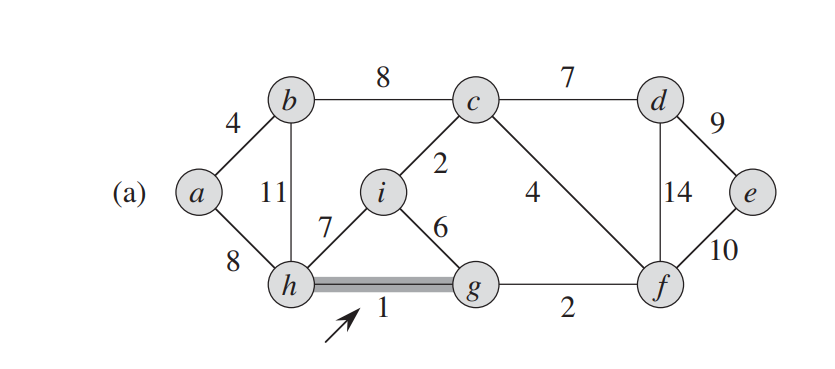

In [5]:

# Implementation of Kruskal Algorithm

class KruskalAlgorithmGraph:
    def __init__(self):
        self.graph = []

    def add_edge_to_graph(self, u, v, w):
        self.graph.append([u, v, w])

    def find_parent_node(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_parent_node(parent, parent[i])

    def union_nodes(self, parent, rank, x, y):
        x_root = self.find_parent_node(parent, x)
        y_root = self.find_parent_node(parent, y)

        if rank[x_root] < rank[y_root]:
            parent[x_root] = y_root
        elif rank[x_root] > rank[y_root]:
            parent[y_root] = x_root
        else:
            parent[y_root] = x_root
            rank[x_root] += 1

    def kruskal_mst_Implementation(self):
        result = []
        i, e = 0, 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = {}
        rank = {}

        for edge in self.graph:
            u, v, w = edge
            if u not in parent:
                parent[u] = u
                rank[u] = 0
            if v not in parent:
                parent[v] = v
                rank[v] = 0

        while e < len(parent) - 1:
            u, v, w = self.graph[i]
            i += 1
            x = self.find_parent_node(parent, u)
            y = self.find_parent_node(parent, v)

            if x != y:
                e += 1
                result.append([u, v, w])
                self.union_nodes(parent, rank, x, y)

        return result

# Example usage
g = KruskalAlgorithmGraph()
g.add_edge_to_graph('C', 'E', 12)
g.add_edge_to_graph('C', 'B', 8)
g.add_edge_to_graph('A', 'D', 4)
g.add_edge_to_graph('B', 'F', 25)
g.add_edge_to_graph('C', 'D', 8)
g.add_edge_to_graph('D', 'A', 2)
g.add_edge_to_graph('F', 'B', 16)
g.add_edge_to_graph('F', 'G', 20)
g.add_edge_to_graph('A', 'F', 3)
g.add_edge_to_graph('G', 'B', 15)
g.add_edge_to_graph('B', 'D', 9)

print("Edges in the minimum spanning tree using Kruskal Algorithm:")
print(g.kruskal_mst_Implementation())

Edges in the minimum spanning tree using Kruskal Algorithm:
[['D', 'A', 2], ['A', 'F', 3], ['C', 'B', 8], ['C', 'D', 8], ['C', 'E', 12], ['G', 'B', 15]]
